In [1]:
%config InlineBackend.figure_format = 'retina'

# Two Dimensional Histograms



In [2]:
import numpy as np
import matplotlib.pyplot as plt


size1 = 50000
mean1 = [2,2]
cov1 = [[1, 0.8],[0.8,1]]
sample1 = np.random.multivariate_normal(mean1, cov1, size=size1)

size2 = 25000
mean2 = [-3,-1]
cov2 = [[1, -0.4],[-0.4,1]]
sample2 = np.random.multivariate_normal(mean2, cov2, size=size2)

size3 = 20000
mean3 = [0,-3]
cov3 = [[0.2, -1],[0,-0.2]]
sample3 = np.random.multivariate_normal(mean3, cov3, size=size3)

sample = np.concatenate((sample1,sample2,sample3))
# sample = np.concatenate((sample1,sample2))


/var/folders/m6/8k94r84d6qq_67mq2lnhvrzh0000gn/T/ipykernel_58884/2115343893.py:18: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  sample3 = np.random.multivariate_normal(mean3, cov3, size=size3)


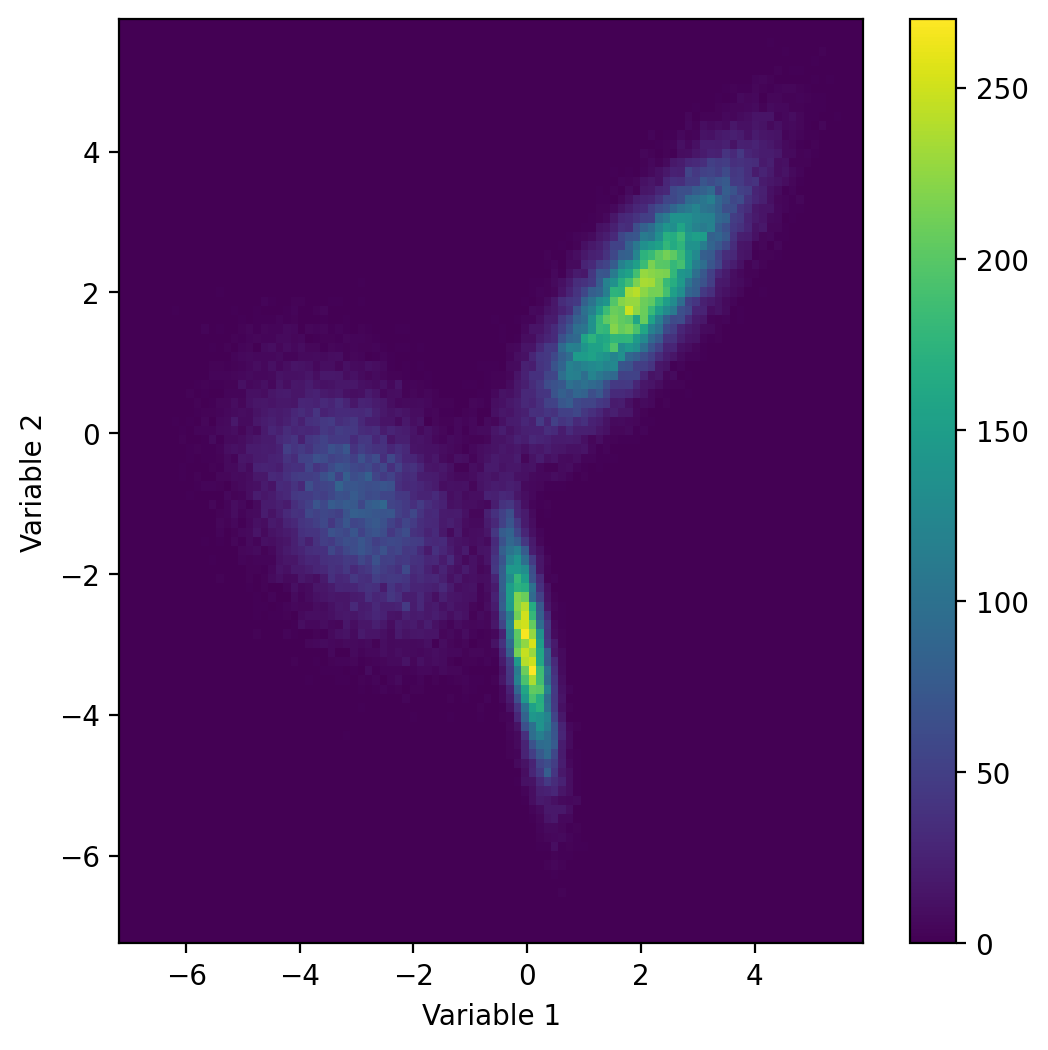

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
ounts, xedges, yedges, im = ax.hist2d(sample[:,0],sample[:,1], bins=100)
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

plt.colorbar(im)

[Text(1, 0.0, '0'), Text(1, 270.0, 'Lots!')]

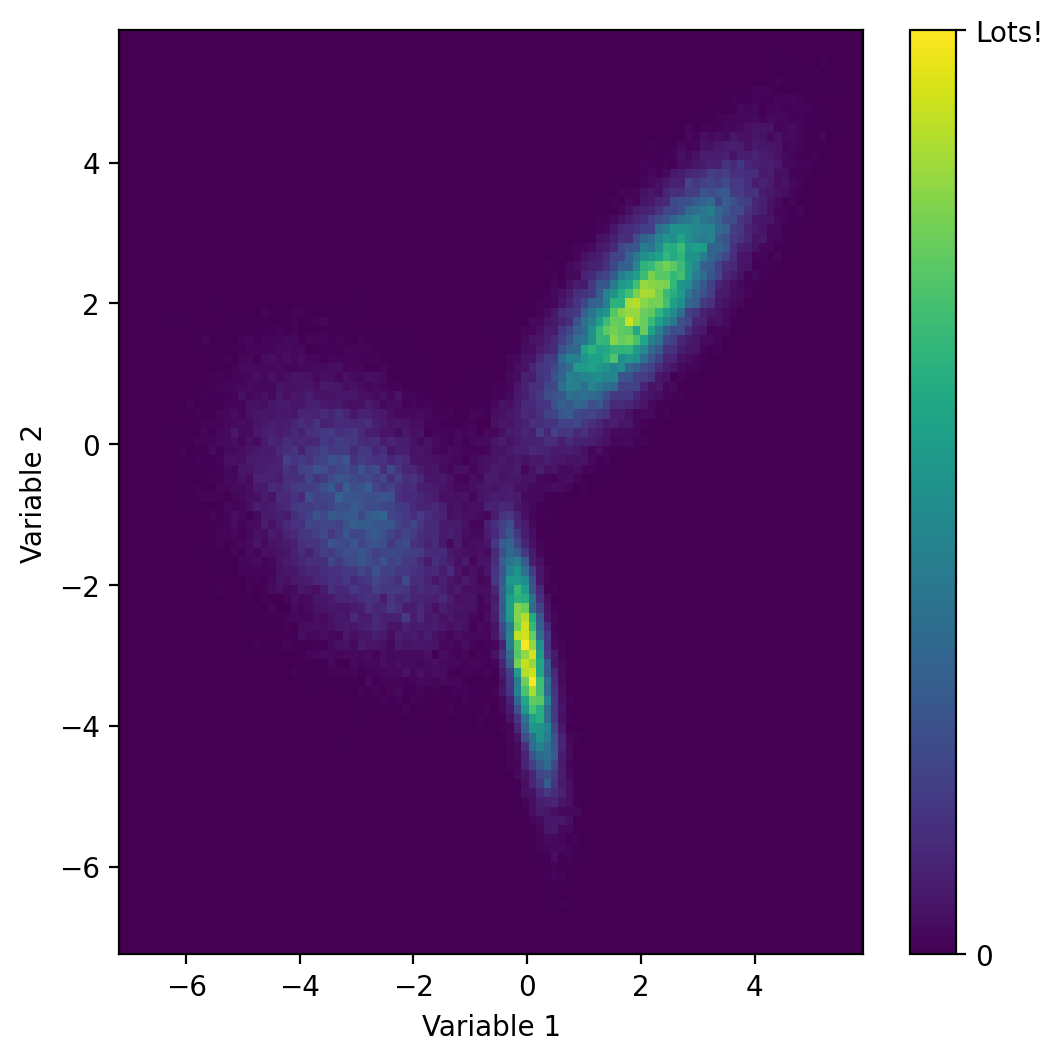

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
counts, xedges, yedges, im = ax.hist2d(sample[:,0],sample[:,1], bins=100)
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

cbar = plt.colorbar(im,ticks=[counts.min(),counts.max()])
cbar.ax.set_yticklabels(['0', 'Lots!']) 

Now that we have the data above, it's sometimes beneficial to also see the one dimensional distributions of each individual variable, in addition to the joint, two-dimensional distribution as shown above. Let's create a histogram that shows each of these with a subplot each:

Text(0, 0.5, 'Counts')

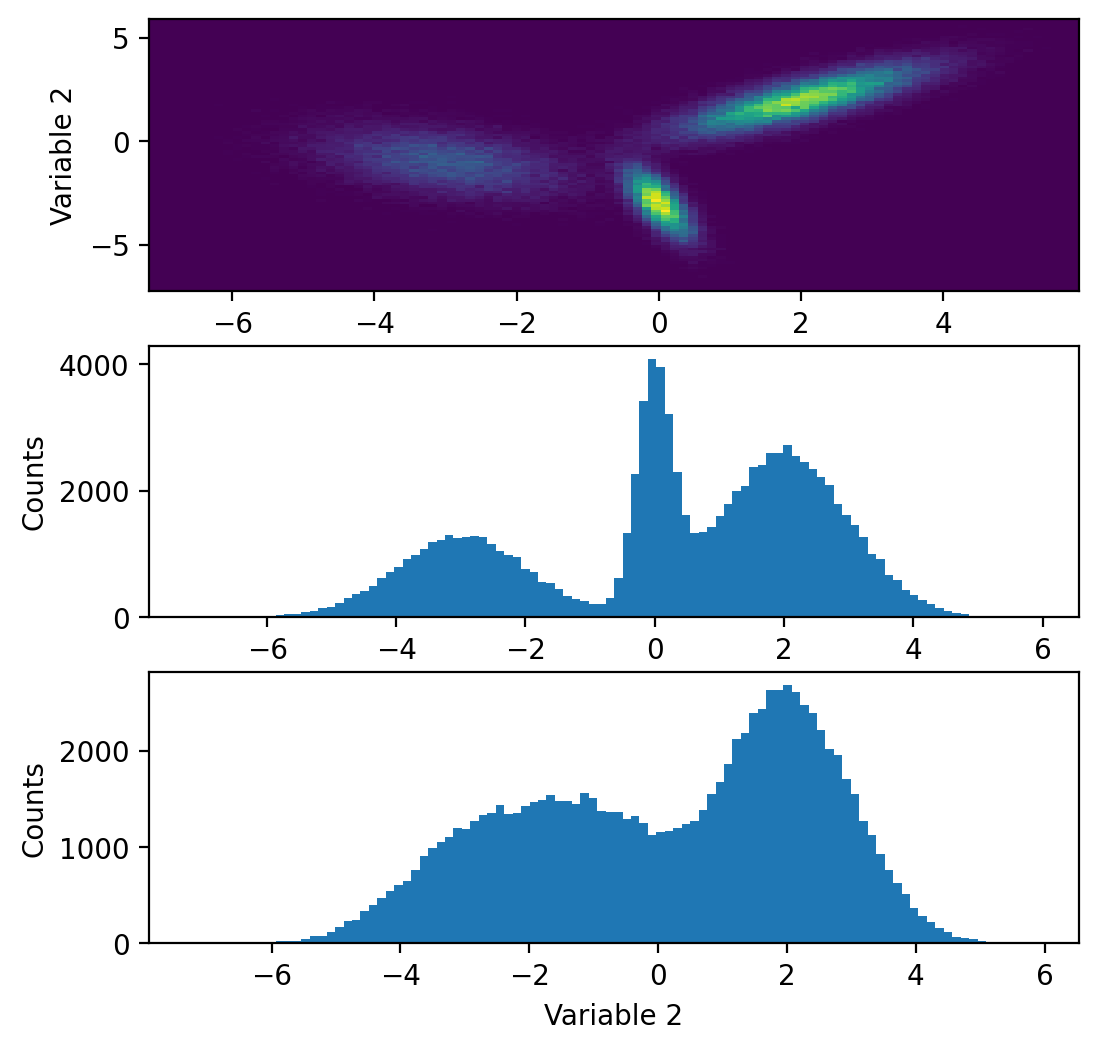

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(6,6))
ax1.hist2d(sample[:,0],sample[:,1], bins=100)
ax1.set_xlabel('Variable 1')
ax1.set_ylabel('Variable 2')

ax2.hist(sample[:,0],bins=100)

ax2.set_xlabel('Variable 1')
ax2.set_ylabel('Counts')

ax3.hist(sample[:,1],bins=100)

ax3.set_xlabel('Variable 2')
ax3.set_ylabel('Counts')

As we discussed before, you can do highly customized plotting with matplotlib, even though it may take a bit more code to get there. One example of this is creating custom combinations of subplots. Let's say we want to show our two-dimensional histogram along with the one-dimensional histogram of each of the individual variables. We can do this with matplotlib by setting up our axes to have a large area for the 2D histogram and smaller regions for the one-dimensional histograms.

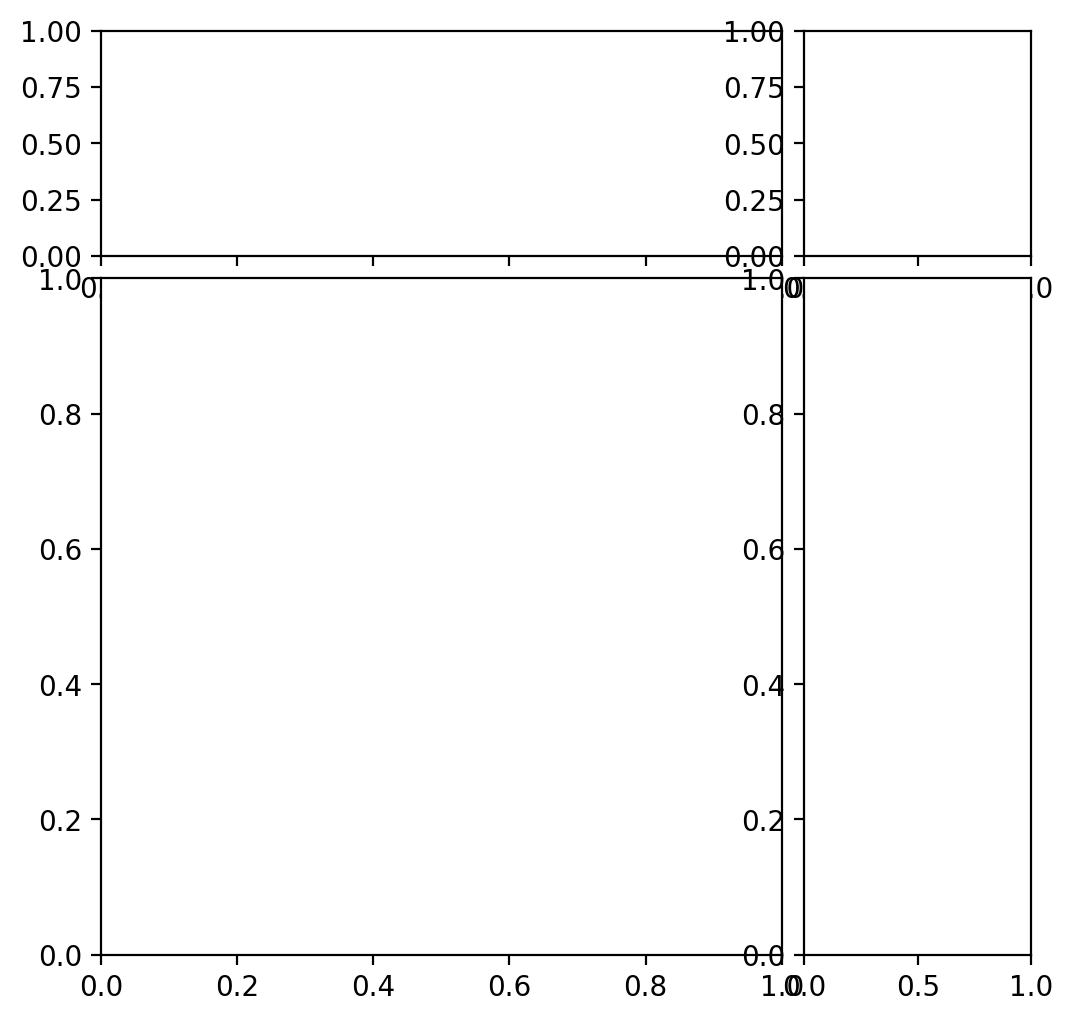

In [6]:
fig,ax=plt.subplots(2,2,
                    figsize=(6,6),
                    width_ratios=[0.75,0.25], # Makes the axis for the 2D histogram claim 75% of the width of the plot
                    height_ratios=[0.25,0.75]) # Makes the axis for the 2D histogram claim 75% of the height of the plot

fig.subplots_adjust(hspace=0.05, wspace=0.05) # Reduces the space between the subplots

Now, we just need to add the plots to each of the axes that we just created.

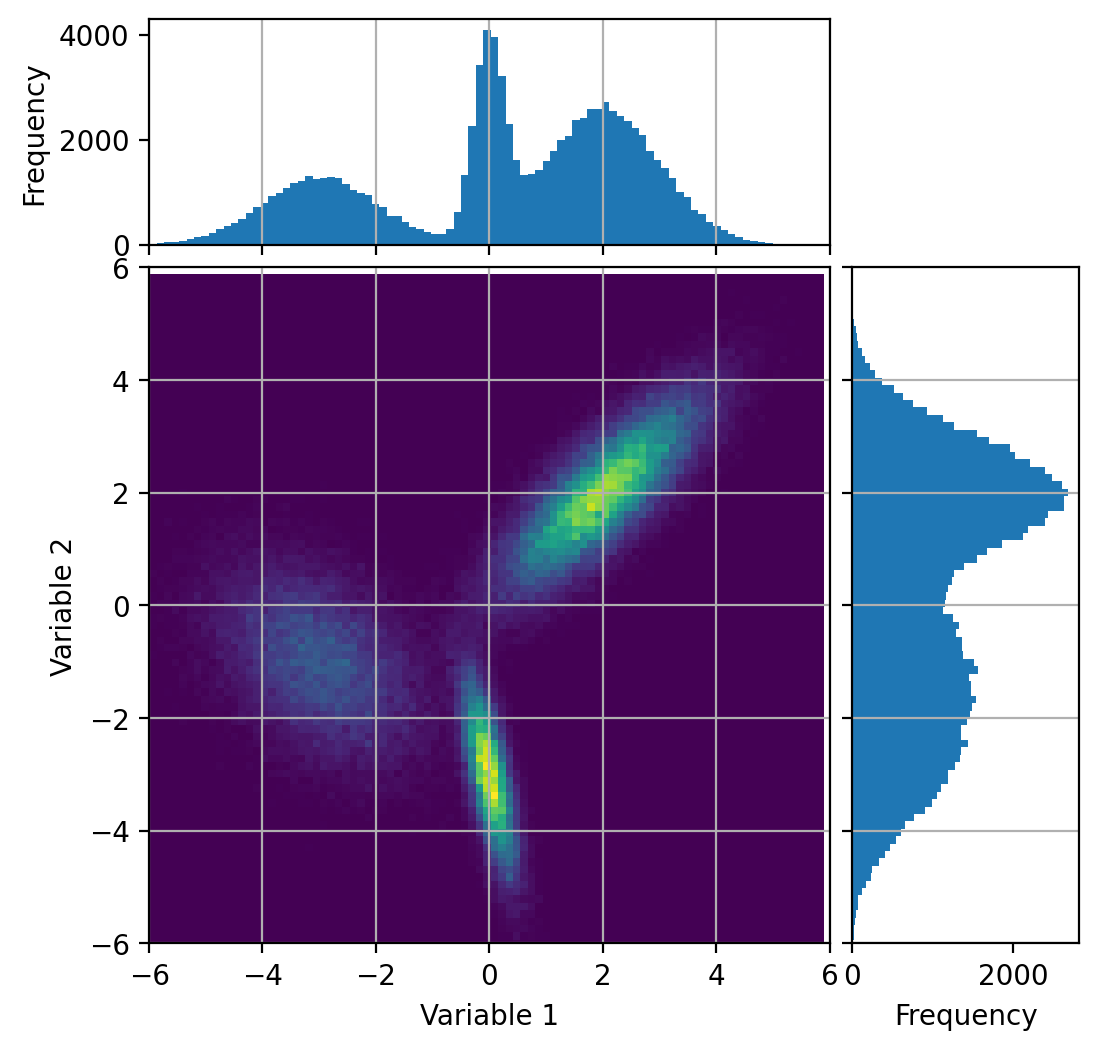

In [7]:
fig,[[ax1,ax_none],[ax2D,ax2]]=plt.subplots(2,2,
                    figsize=(6,6),
                    width_ratios=[0.75,0.25],
                    height_ratios=[0.25,0.75])

fig.subplots_adjust(hspace=0.05, wspace=0.05)

limits = [-6,6]

ax2D.hist2d(sample[:,0],sample[:,1], bins=100)
ax2D.set_xlabel('Variable 1')
ax2D.set_ylabel('Variable 2')
ax2D.set_xlim(limits)
ax2D.set_ylim(limits)
ax2D.grid(visible=True)

ax1.hist(sample[:,0],bins=100)
ax1.set_xlim(limits)
ax1.set_ylabel('Frequency')
ax1.set_xticklabels([])
ax1.grid(visible=True, axis='x')

ax2.hist(sample[:,1],bins=100,orientation='horizontal')
ax2.set_ylim(limits)
ax2.set_xlabel('Frequency')
ax2.set_yticklabels([])
ax2.grid(visible=True, axis='y')

ax_none.axis('off')

plt.show()

Two-dimensional histograms, as shown in the example above, reveal relationships that aren't always visible in one-dimensional histograms of individual variables. This is a common theme of data visualization - if we explore our data in new ways, we learn more about its properties and those insights can help with both understanding and more effective modeling of our data.